In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [89]:
dframe = pd.read_excel("110ad.xlsx")

In [90]:
training_set = DataFrame(dframe)
training_set = training_set.T
training_set.head()


,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
Activity1,0.000000,0.000000,0.000000,0.000000,0.000788,0.000000,0.000119,0.000434,0.000788,0.000394,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Activity2,0.000000,0.000041,0.000041,0.000451,0.000041,0.000000,0.000410,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Activity3,0.000079,0.000000,0.000040,0.000395,0.000395,0.000395,0.000789,0.000474,0.000040,0.000395,...,0.0,0.0,0.00004,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Activity4,0.000405,0.000041,0.000000,0.000446,0.000041,0.000000,0.000811,0.000811,0.000405,0.000446,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Activity5,0.000000,0.000781,0.000391,0.000078,0.000000,0.000781,0.000000,0.000391,0.005940,0.035870,...,0.0,0.0,0.00000,0.000039,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
training_set.shape

(40, 302)

In [92]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set= sc.fit_transform(training_set)

In [93]:
X_train = training_set[0:20,:]
y_train = training_set[20:,:]

In [94]:
X_train[0,:]
#X_train.shape
#y_train

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.22861205e-03, 0.00000000e+00, 6.34808875e-04, 2.31535505e-03,
       4.19351423e-03, 1.99820505e-03, 0.00000000e+00, 0.00000000e+00,
       1.15425576e-03, 1.13671003e-03, 3.84724993e-03, 5.62001650e-02,
       2.96384993e-01, 5.32033948e-01, 4.92192564e-01, 3.94731188e-01,
       1.74301855e-01, 2.80128879e-01, 5.15720841e-01, 9.14712666e-01,
       9.17411015e-01, 8.78196736e-01, 9.89705051e-01, 9.95003220e-01,
       9.60228302e-01, 9.35820375e-01, 9.33849992e-01, 8.90354795e-01,
       6.57010631e-01, 5.76062920e-01, 6.65758788e-01, 7.16196105e-01,
       9.12161578e-01, 8.31189166e-01, 8.48622872e-01, 8.63661017e-01,
       9.26256205e-01, 8.59000000e-01, 9.07596052e-01, 8.74524715e-01,
       8.22662407e-01, 9.11912903e-01, 8.83626302e-01, 8.25871096e-01,
       9.04386385e-01, 8.21705597e-01, 8.92734913e-01, 8.39699409e-01,
       8.46318917e-01, 8.29446193e-01, 7.25439526e-01, 7.81856002e-01,
      

In [64]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # LSTM 输入(1975,60,1) 每次输入60个 输入1975次

In [65]:
X_train.shape

(20, 302, 1)

In [72]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 200, return_sequences = True, input_shape = (X_train.shape[1], 1))) # 
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 200, return_sequences = True))
regressor.add(Dropout(0.2))  # 

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 200, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 200))
regressor.add(Dropout(0.2))



In [73]:
# Adding the output layer
regressor.add(Dense(units = 302))# 指定1个单元的输出作为全连接层（Dense layer

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') # adam优化器编译模型，并用均方误差（mean_squarred_error）来计算误差

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
20/20 [==============================] - 4s 213ms/step - loss: 0.0778
Epoch 2/100
20/20 [==============================] - 1s 63ms/step - loss: 0.0767
Epoch 3/100
20/20 [==============================] - 1s 67ms/step - loss: 0.0752
Epoch 4/100
20/20 [==============================] - 1s 61ms/step - loss: 0.0714
Epoch 5/100
20/20 [==============================] - 1s 63ms/step - loss: 0.0623
Epoch 6/100
20/20 [==============================] - 1s 65ms/step - loss: 0.0498
Epoch 7/100
20/20 [==============================] - 1s 61ms/step - loss: 0.0477
Epoch 8/100
20/20 [==============================] - 1s 59ms/step - loss: 0.0368
Epoch 9/100
20/20 [==============================] - 1s 60ms/step - loss: 0.0347
Epoch 10/100
20/20 [==============================] - 1s 61ms/step - loss: 0.0312
Epoch 11/100
20/20 [==============================] - 1s 60ms/step - loss: 0.0268
Epoch 12/100
20/20 [==============================] - 1s 59ms/step - loss: 0.0259
Epoch 13/100
20/20 [====

In [118]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 302, 200)          161600    
_________________________________________________________________
dropout_13 (Dropout)         (None, 302, 200)          0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 302, 200)          320800    
_________________________________________________________________
dropout_14 (Dropout)         (None, 302, 200)          0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 302, 200)          320800    
_________________________________________________________________
dropout_15 (Dropout)         (None, 302, 200)          0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 200)               320800    
__________

In [104]:
dframe2 = pd.read_excel("114ad.xlsx")

In [105]:
test_set = DataFrame(dframe2)
test_set = test_set.T
#test_set.head()


In [107]:
test_set = np.array(test_set)

In [108]:
X_test = test_set[0,:]
Y_test = test_set[1,:]

In [114]:
X_test = np.array(X_test)
X_test.shape
#Y_test.shape
#Y_test[10,]

(302,)

In [120]:
X_test = np.reshape(X_test, (1, X_test.shape[0], 1))

X_test.shape

(1, 302, 1)

In [121]:
predicted_test = regressor.predict(X_test)
predicted_test = sc.inverse_transform(predicted_test)

In [130]:
predicted_test = predicted_test.reshape(302,)

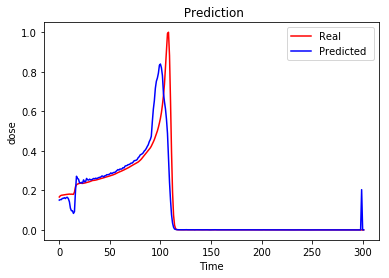

In [131]:
plt.plot(Y_test, color = 'red', label = 'Real ')
plt.plot(predicted_test, color = 'blue', label = 'Predicted ')
plt.title(' Prediction')
plt.xlabel('Time')
plt.ylabel('dose')
plt.legend()
plt.show()